# Aprendizaje no supervisado

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

In [33]:
penguins = pd.read_csv('penguins_lter.csv')

In [34]:
# Mostrar información del dataset
print(penguins.info())
print("\nPrimeras filas:")
print(penguins.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [35]:
# Limpieza de datos
print("\nValores nulos por columna:")
print(penguins.isnull().sum())

# Eliminar filas con valores nulos y columnas no numéricas
penguins_clean = penguins.dropna().drop(['species', 'island', 'sex', 'year'], axis=1, errors='ignore')

print("\nDataset limpio:")
print(penguins_clean.head())


Valores nulos por columna:
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Dataset limpio:
   studyName  Sample Number                              Species  Region  \
6    PAL0708              7  Adelie Penguin (Pygoscelis adeliae)  Anvers   
7    PAL0708              8  Adelie Penguin (Pygoscelis adeliae)  Anvers   
28   PAL0708             29  Adelie Penguin (Pygoscelis adeliae)  Anvers   
29   PAL0708             30  Adelie Penguin (Pygoscelis adeliae)  Anvers   
38   PAL0708             39  Adelie Penguin (Pygoscelis adeliae)  Anvers   

       Island             

In [36]:
# Verificar nulos y tipos de datos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

### Análisis exploratorio

       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count      13.000000           13.000000          13.000000   
mean       79.769231           38.769231          18.361538   
std        52.714884            2.107678           1.128080   
min         7.000000           35.900000          16.500000   
25%        30.000000           37.600000          17.800000   
50%        70.000000           38.500000          18.600000   
75%       131.000000           39.700000          19.300000   
max       140.000000           43.100000          19.800000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count            13.000000      13.000000          13.000000   
mean            188.230769    3640.384615           8.966701   
std               8.115354     527.231217           0.332579   
min             172.000000    3050.000000           8.384040   
25%             181.000000    3300.000000           8.864950   
50%             190.000000    3500.000000       

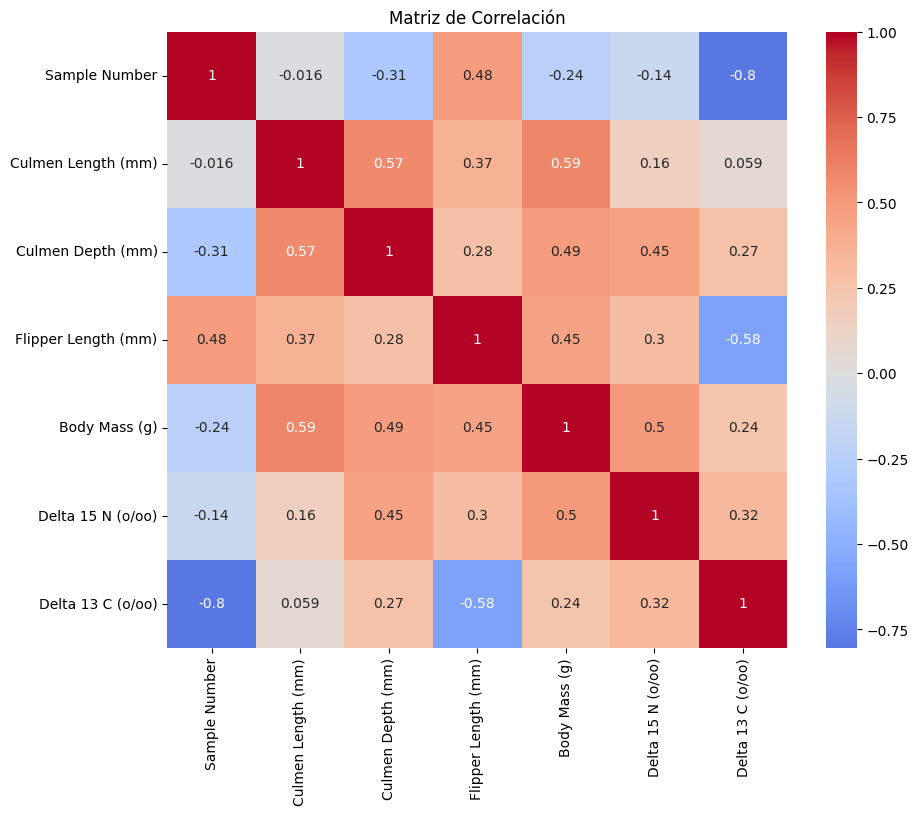

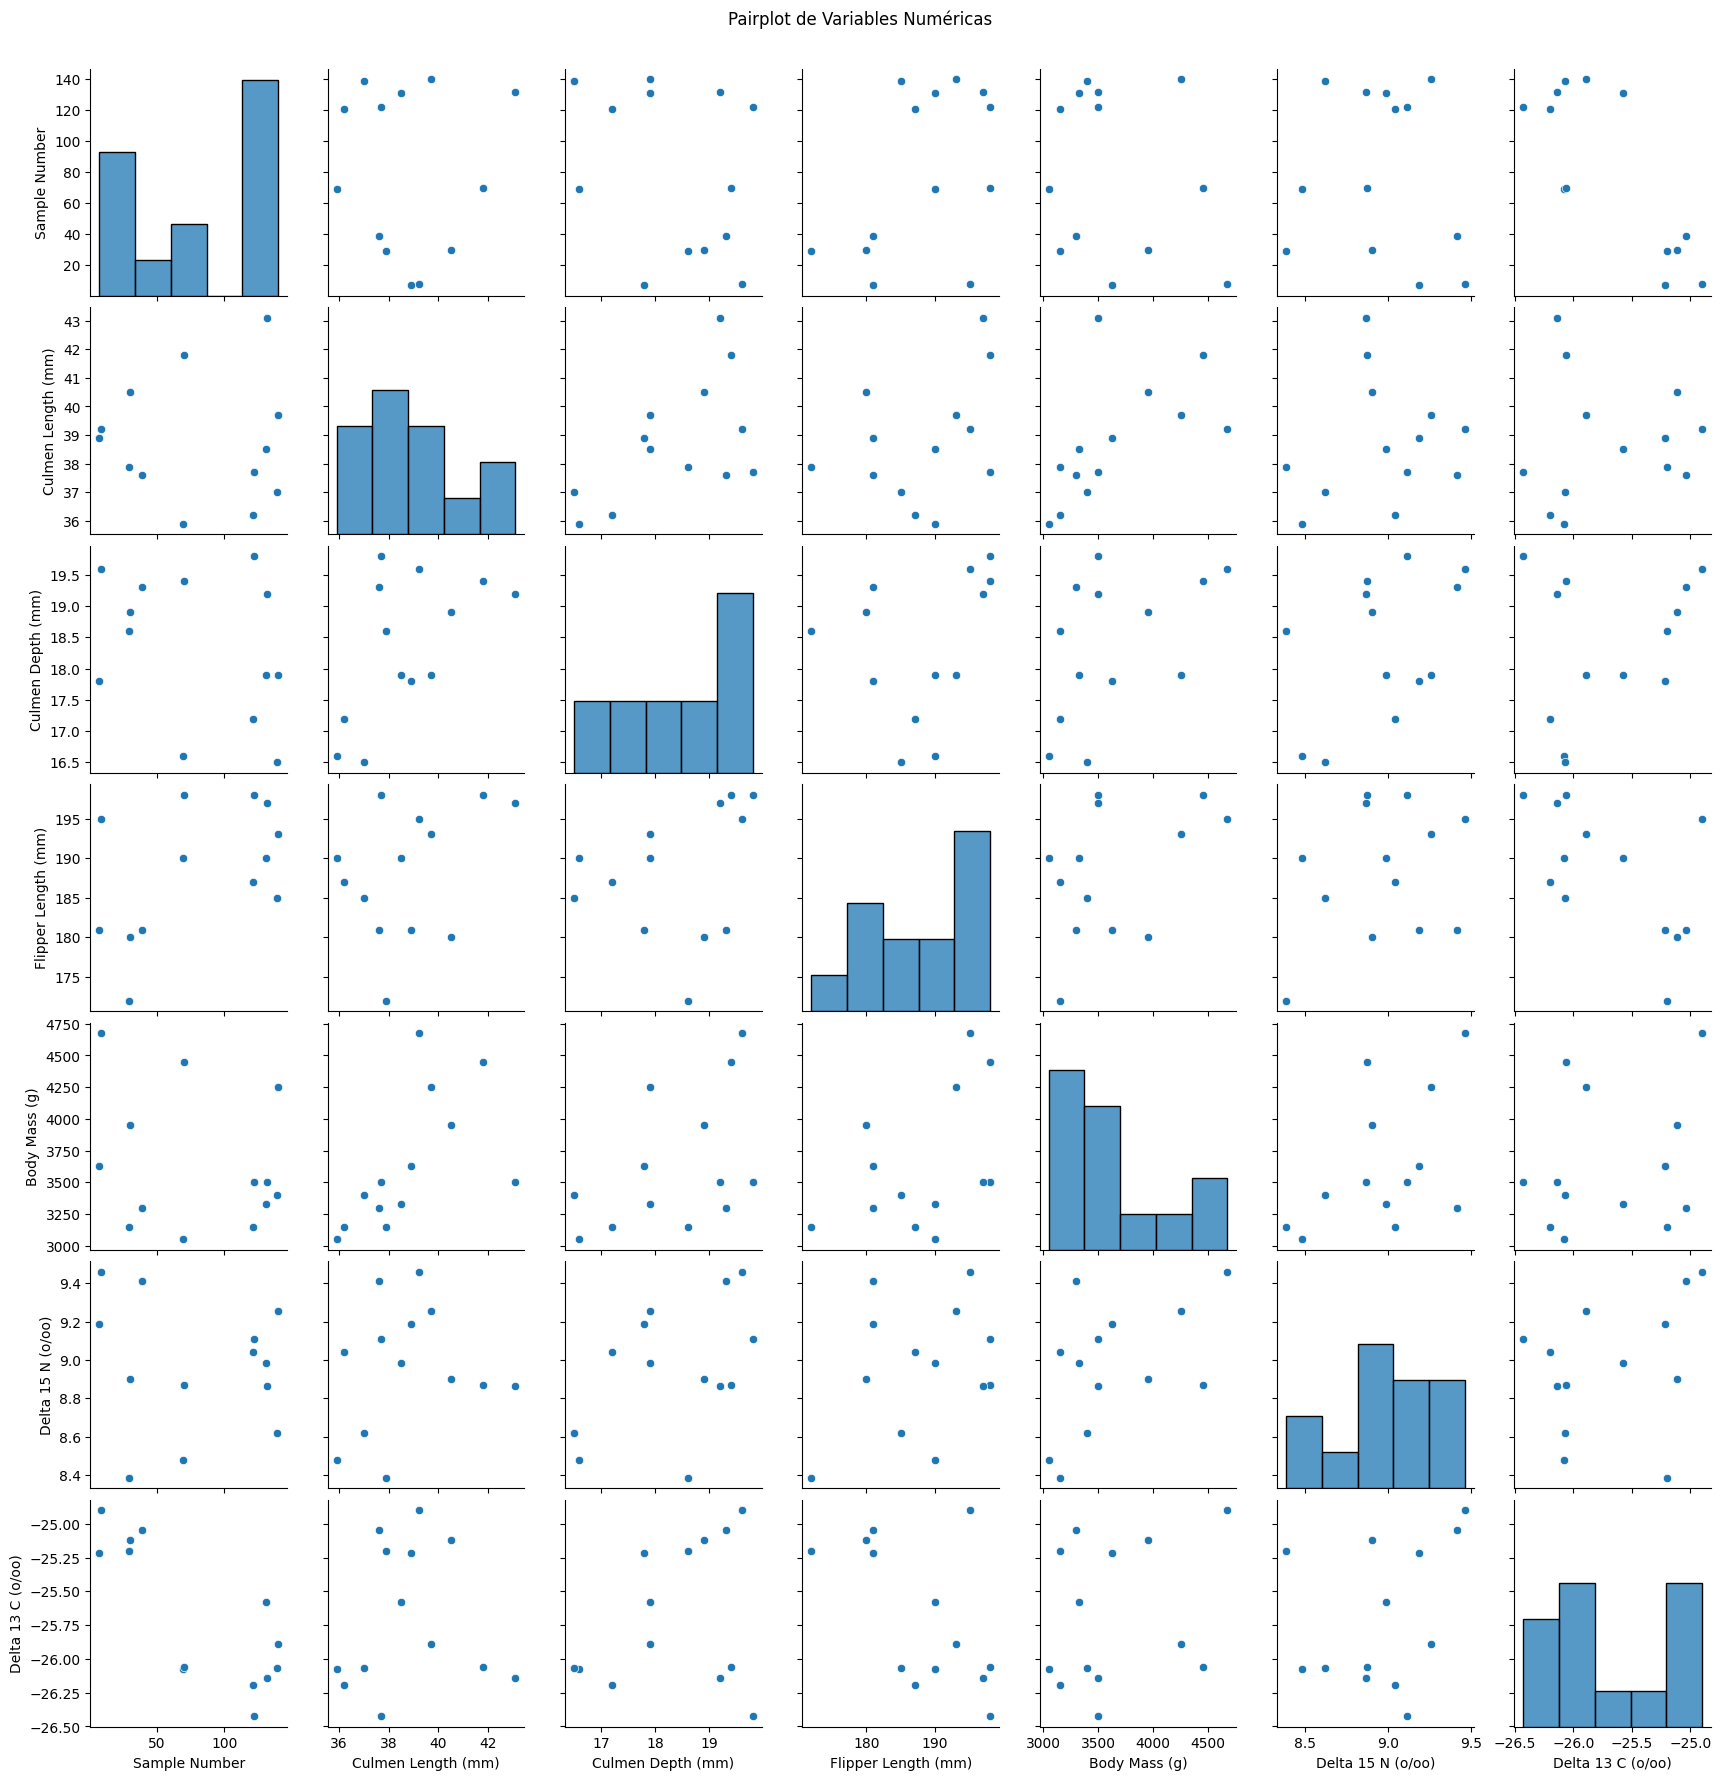

In [37]:
# Estadísticas descriptivas
print(penguins_clean.describe())

# Seleccionar solo columnas numéricas
penguins_num = penguins_clean.select_dtypes(include=[np.number])

# Matriz de correlación solo con variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = penguins_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Pairplot para visualizar relaciones
sns.pairplot(penguins_clean)
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()

### Aplicación de PCA

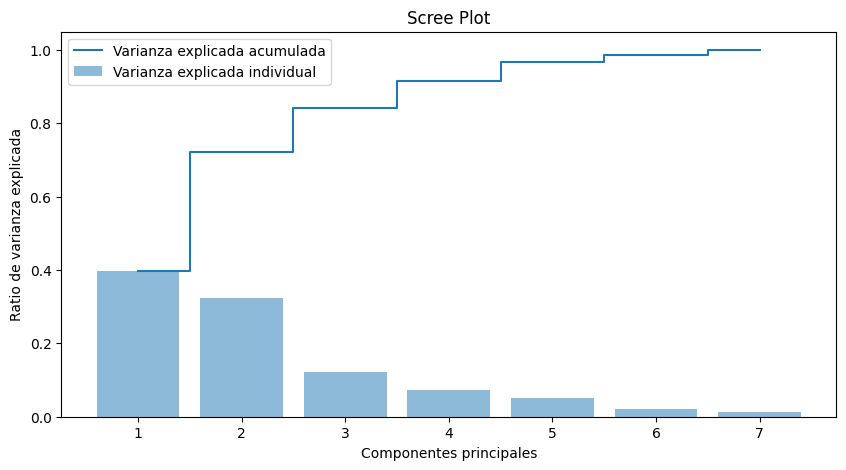

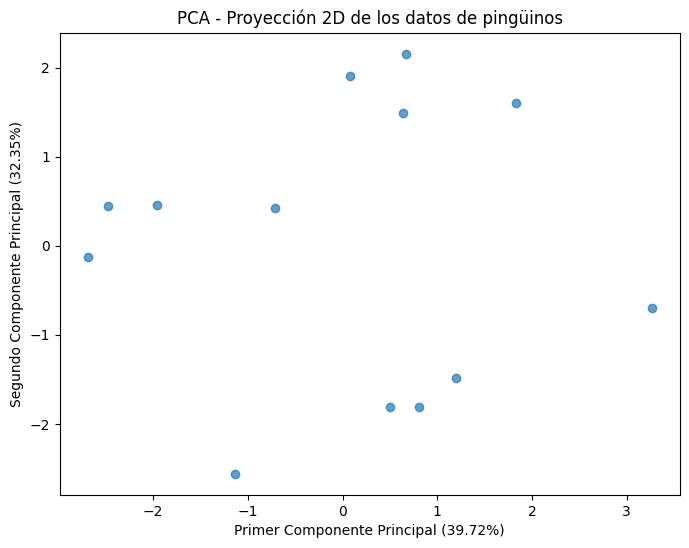

In [39]:
# Seleccionar solo columnas numéricas y eliminar filas con nulos
penguins_num = penguins_clean.select_dtypes(include=[np.number]).dropna()

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_num)

# PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, align='center',
        label='Varianza explicada individual')
plt.step(range(1, len(explained_var)+1), np.cumsum(explained_var), where='mid',
         label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

# Reducción a 2 componentes
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Visualización 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Primer Componente Principal (%.2f%%)' % (pca_2d.explained_variance_ratio_[0]*100))
plt.ylabel('Segundo Componente Principal (%.2f%%)' % (pca_2d.explained_variance_ratio_[1]*100))
plt.title('PCA - Proyección 2D de los datos de pingüinos')
plt.show()

### Selección de características

In [44]:
# Método 1: Eliminar variables altamente correlacionadas
threshold = 0.8
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
             for x, y in zip(*high_corr) if x != y and x < y]

print("Variables altamente correlacionadas (|r| > 0.8):")
for pair in high_corr:
    print(f"{pair[0]} y {pair[1]}")
# Eliminar una de cada par (manual basado en análisis)
# En este caso, eliminamos 'Flipper Length (mm)' porque está altamente correlacionada con 'Body Mass (g)'
penguins_selected = penguins_clean.drop(['Flipper Length (mm)'], axis=1)

# Método 2: Selección basada en importancia de características (usando target artificial de KMeans)
# Usar solo variables numéricas para SelectKBest
penguins_num = penguins_clean.select_dtypes(include=[np.number])

kmeans_temp = KMeans(n_clusters=3, random_state=42)
temp_labels = kmeans_temp.fit_predict(penguins_num)

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(penguins_num, temp_labels)

selected_features = penguins_num.columns[selector.get_support()]
print("\nVariables seleccionadas por SelectKBest:", list(selected_features))

# Usaremos ambos métodos para comparación

Variables altamente correlacionadas (|r| > 0.8):
Sample Number y Delta 13 C (o/oo)

Variables seleccionadas por SelectKBest: ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']


### Aplicación de K-means


=== DATOS ORIGINALES ESCALADOS ===


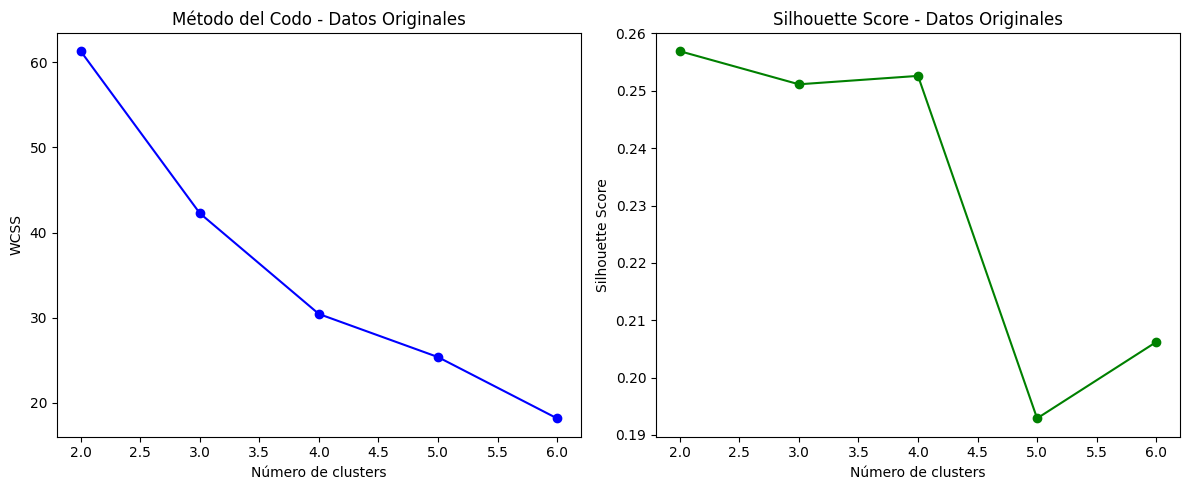


Mejor k para Datos Originales según silhouette score: 2

=== DATOS CON PCA (2 COMPONENTES) ===


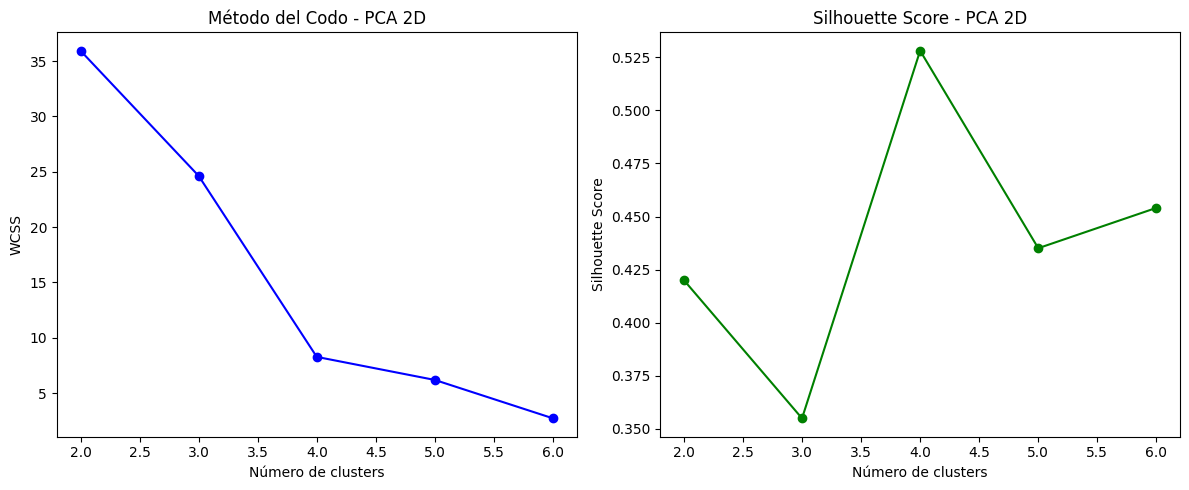


Mejor k para PCA 2D según silhouette score: 4

=== DATOS CON SELECCIÓN POR CORRELACIÓN ===


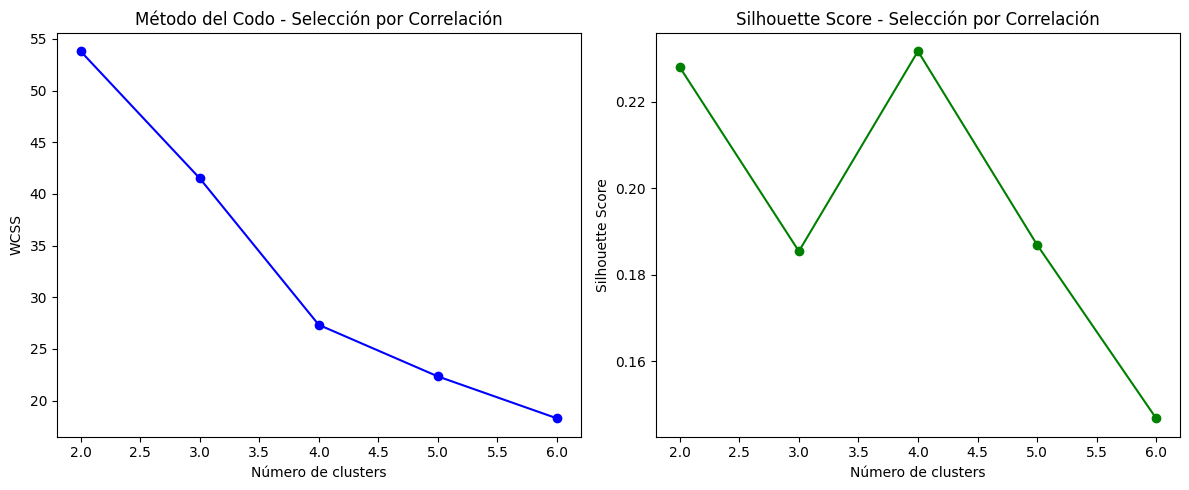


Mejor k para Selección por Correlación según silhouette score: 4

=== DATOS CON SELECCIÓN POR IMPORTANCIA ===


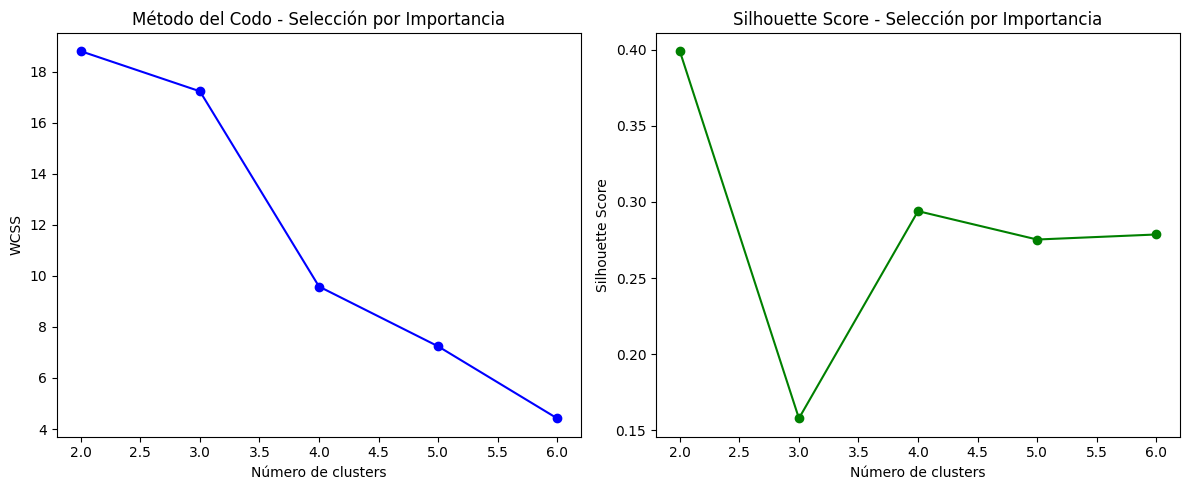


Mejor k para Selección por Importancia según silhouette score: 2


In [47]:
def evaluate_kmeans(X, dataset_name, max_k=6):
    wcss = []
    sil_scores = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)
        
        if len(np.unique(labels)) >= 2:
            sil_scores.append(silhouette_score(X, labels))
        else:
            sil_scores.append(0)
    
    # Gráficos
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k+1), wcss, 'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.title(f'Método del Codo - {dataset_name}')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k+1), sil_scores, 'go-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score - {dataset_name}')
    
    plt.tight_layout()
    plt.show()
    
    # Mejor k según silhouette
    best_k = np.argmax(sil_scores) + 2  # +2 porque empezamos en k=2
    print(f"\nMejor k para {dataset_name} según silhouette score: {best_k}")
    
    return best_k

# Versión 1: Datos originales escalados
print("\n=== DATOS ORIGINALES ESCALADOS ===")
best_k_original = evaluate_kmeans(X_scaled, "Datos Originales")

# Versión 2: Datos con PCA
print("\n=== DATOS CON PCA (2 COMPONENTES) ===")
best_k_pca = evaluate_kmeans(X_pca, "PCA 2D")

# Versión 3: Datos con selección por correlación
# Seleccionar solo columnas numéricas después de eliminar la columna correlacionada
penguins_selected_num = penguins_selected.select_dtypes(include=[np.number])
X_selected_corr = scaler.fit_transform(penguins_selected_num)
print("\n=== DATOS CON SELECCIÓN POR CORRELACIÓN ===")
best_k_selected_corr = evaluate_kmeans(X_selected_corr, "Selección por Correlación")

# Versión 4: Datos con selección por importancia
# Eliminar filas con NaN solo en las columnas seleccionadas
penguins_kbest = penguins_clean[selected_features].dropna()
X_selected_kbest = scaler.fit_transform(penguins_kbest)
print("\n=== DATOS CON SELECCIÓN POR IMPORTANCIA ===")
best_k_selected_kbest = evaluate_kmeans(X_selected_kbest, "Selección por Importancia")

### Clusters óptimos


Visualización de clusters óptimos:


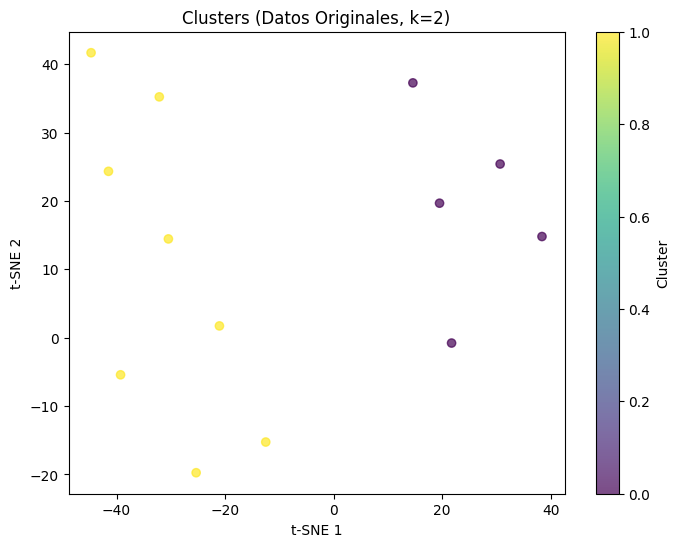

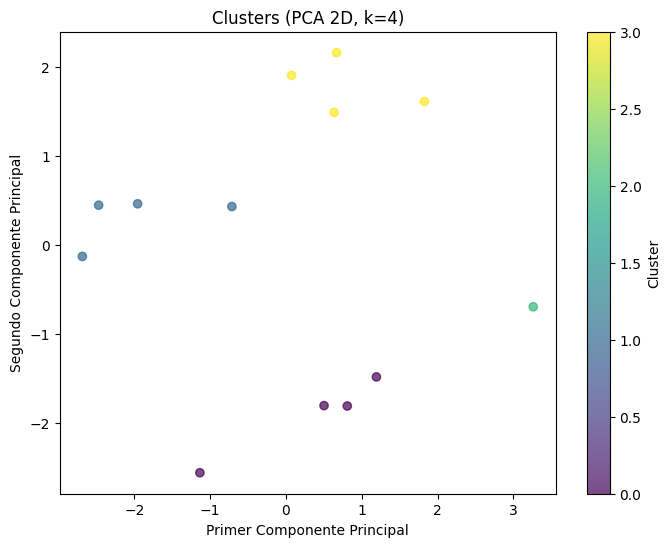

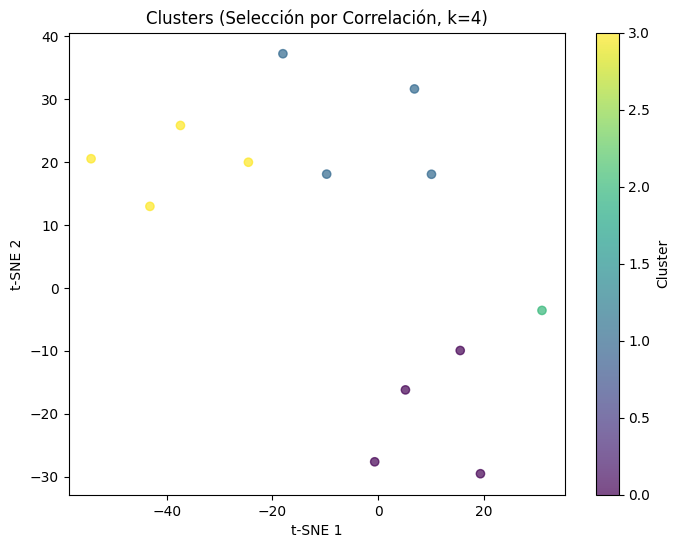

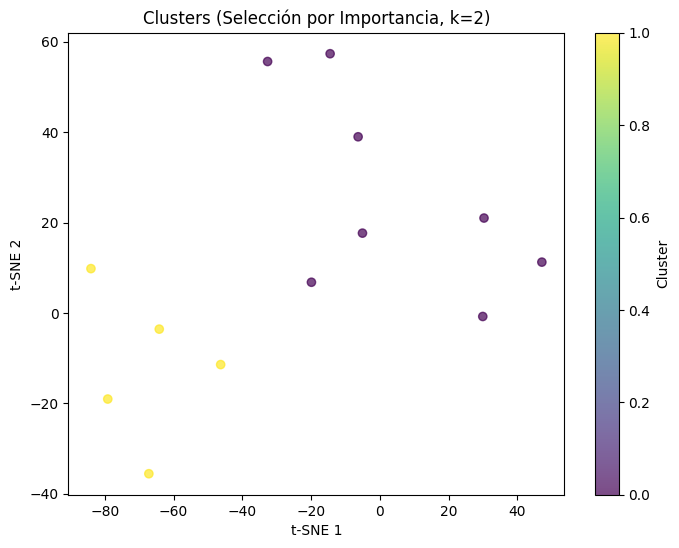

In [51]:
def plot_clusters(X, k, title, pca=False):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    plt.figure(figsize=(8, 6))
    
    if pca:
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
        plt.xlabel('Primer Componente Principal')
        plt.ylabel('Segundo Componente Principal')
    else:
        # Para visualizar en 2D aunque tengamos más dimensiones
        if X.shape[1] > 2:
            from sklearn.manifold import TSNE
            # Ajusta perplexity a un valor menor que el número de muestras
            perplexity = min(5, X.shape[0] - 1)
            X_vis = TSNE(n_components=2, random_state=42, perplexity=perplexity).fit_transform(X)
            plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='viridis', alpha=0.7)
            plt.xlabel('t-SNE 1')
            plt.ylabel('t-SNE 2')
        else:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
    
    plt.title(f'Clusters ({title}, k={k})')
    plt.colorbar(label='Cluster')
    plt.show()

# Visualización para cada versión
print("\nVisualización de clusters óptimos:")

# Datos originales (usamos t-SNE para visualización)
plot_clusters(X_scaled, best_k_original, "Datos Originales")

# Datos con PCA
plot_clusters(X_pca, best_k_pca, "PCA 2D", pca=True)

# Datos con selección por correlación
plot_clusters(X_selected_corr, best_k_selected_corr, "Selección por Correlación")

# Datos con selección por importancia
plot_clusters(X_selected_kbest, best_k_selected_kbest, "Selección por Importancia")

### Comparación de resultados

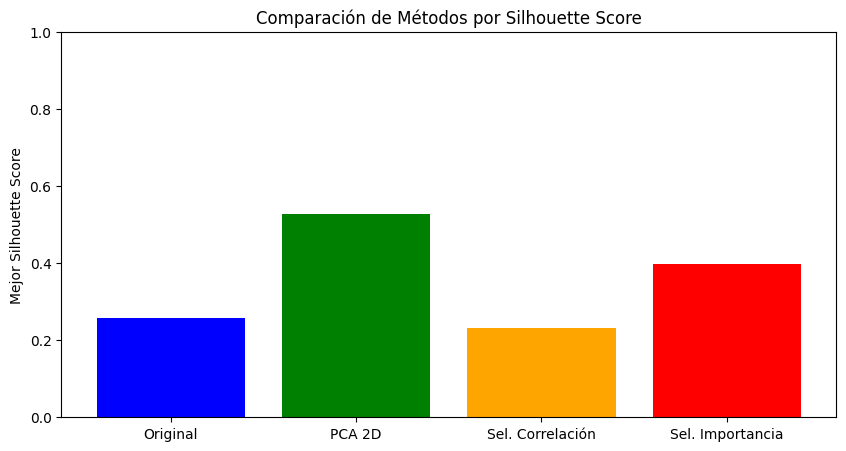


=== RESUMEN DE RESULTADOS ===
Original: 0.257
PCA 2D: 0.528
Sel. Correlación: 0.232
Sel. Importancia: 0.399


In [52]:
# Comparación 
def get_best_silhouette(X, max_k=6):
    best_score = -1
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        if len(np.unique(labels)) >= 2:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
    return best_score

scores = {
    "Original": get_best_silhouette(X_scaled),
    "PCA 2D": get_best_silhouette(X_pca),
    "Sel. Correlación": get_best_silhouette(X_selected_corr),
    "Sel. Importancia": get_best_silhouette(X_selected_kbest)
}

# Gráfico de comparación
plt.figure(figsize=(10, 5))
plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Mejor Silhouette Score')
plt.title('Comparación de Métodos por Silhouette Score')
plt.ylim(0, 1)
plt.show()

# Mostrar resultados
print("\n=== RESUMEN DE RESULTADOS ===")
for method, score in scores.items():
    print(f"{method}: {score:.3f}")